In [23]:
!pip install face_recognition
# !pip install cv2

In [24]:
import face_recognition
import cv2

In [25]:
# import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
# import cv2_imshow
import cv2
import os
from datetime import datetime


# face_1 = face_recognition.load_image_file("/conteDanial.jpeg")
# face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("facedataset/Faizan.jpeg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("facedataset/Owais.jpeg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

face_4 = face_recognition.load_image_file("facedataset/Ahmed.jpeg")
face_4_encoding = face_recognition.face_encodings(face_4)[0]


known_face_encodings = [
    # face_1_encoding,
    face_2_encoding,
    face_3_encoding,
    face_4_encoding
   
]
known_face_names = [
    "Faizan",
    "Owais",
    "Ahmed"
]

print("Done learning and creating profiles")

Done learning and creating profiles


Ahmed


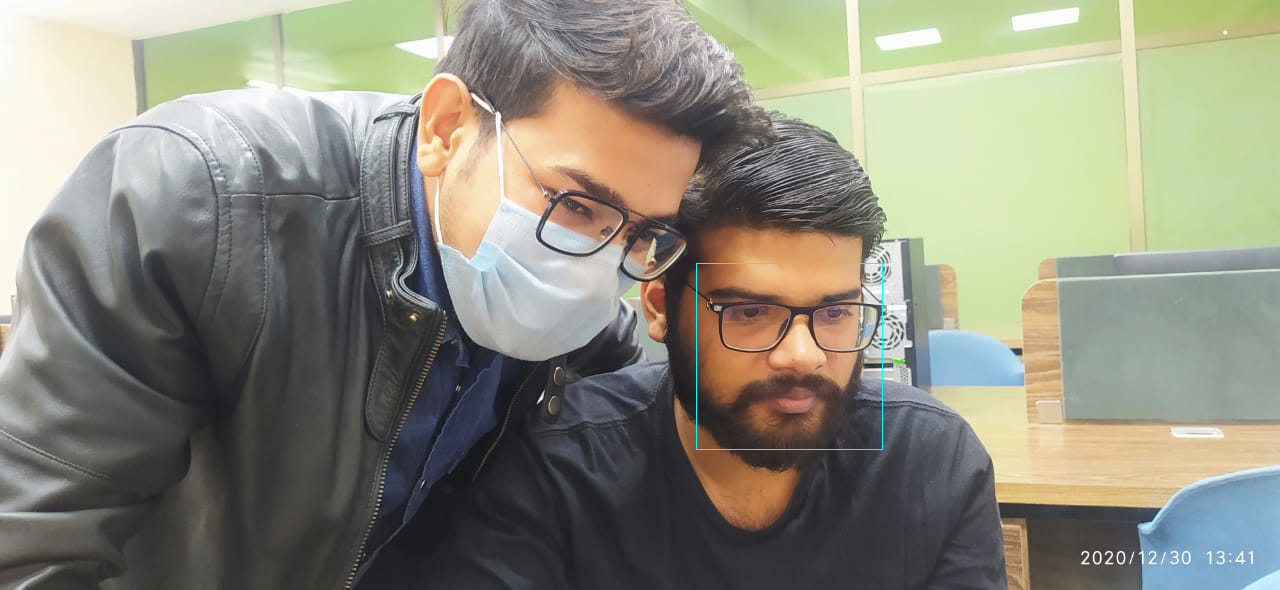

In [26]:
file_name = "facedataset/AhmedT2.jpeg"
# file_name =cv2.VideoCapture(0)
unknown_image = face_recognition.load_image_file(file_name)
# unknown_image = face_recognition
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]


    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    # makeAttendanceEntry(name)

display(pil_image)
# cv2_imshow(unknown_image_to_draw)

In [35]:
# import libraries
import cv2
import face_recognition

# Get a reference to webcam 
video_capture = cv2.VideoCapture("/dev/video1")

# Initialize variables
face_locations = []

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)

    # Display the results
    for top, right, bottom, left in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()